## <a class="anchor" id="top"></a>Note: You MUST download each of the cleaned datasets at the bottom of this notebook for it to run. Make sure they are in the same directory as this notebook.

## ~~Note 2: Please include the final version of this notebook in the final project submission, as it documents all of the codework, merges, and data sourcing.~~

# Table of Contents
1. [Python Library Imports](#imports)  
2. [Creating Master Dataframe](#cleaning)  
    i. [Enrollment Data](#enrollment)  
    ii. [Modernization Data](#modernization)  
    iii. [Data Integrity Check](#integrity)  
    iv. [Graduation Data](#graduation)  
    v. [Performance Data](#performance)  
    vi. [Finishing Touches](#finish)  
    vii. [Subsetting Master Dataframe](#subset)  
3. [Visualizations](#dataviz)  
4. [Data Sources](#sources)  

# Imports <a class="anchor" id="imports"></a><font size = 2>[[top]](#top)

To begin, we need to import the necessary modules for this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
pd.options.display.html.use_mathjax = False

# Data Wrangling, Merging & Cleaning <a class="anchor" id="cleaning"><font size = 2>[[top]](#top)
__Posthumous Commentary:__ The following section 2, meaning the bulk of this notebook, was originally created to assist rising data analysts get peer-level insight on how data cleaning was done for this project. __Any reader who is either an experienced data analyst or has no interest in the minutiae of data cleaning should skip directly to section 2.vii or section 3 for data by year, visualizations, and conclusions on the data.__  
Currently is it undecided whether or not this project will be revisited in the future, namely to couple this notebook with its due written report giving the problem statement, explanation of processes, projected conclusions, and so forth. While said report does currently exist, it was brought about due to the efforts of my former colleagues, thus I have no desire to, without consent, publish work not solely original to me alongside this notebook which was my sole creation.

### Enrollment Dataset <a class="anchor" id="enrollment"></a><font size = 2>[[top]](#top)

The first datasheet we will be dealing with is the DC Open Data's city-wide "School Fact Sheet" for the year of 2016-17. __This is an arbitrary starting point.__<br>
This dataset includes information on every school in-operation during the 2015-2016 school year.<br>
Specifically, it details each school's:
- ID
- Appropriate sector (being within the District of Columbia Public Schools or within the Public Charter Schools)
- Address
- Ward
- Enrollment and Enrollment Breakdown per Grade section
- Existence of additional campuses

It should also be noted that the initial three datasets dealt with were cleaned in OpenRefine, whereas the latter sets were cleaned in this notebook.

In [2]:
sy1617 = pd.read_excel('SY16-17_Citywide School Fact Sheets Appendices_10.06.17_2.xlsx', sheet_name=0)
display(sy1617.shape)
display(sy1617.head())

(234, 13)

,School ID,Sector,School Name,"School Address, SY16-17",Ward,Grades Served,Total Enrollment \n(all grades),PK3-5th Enrollment,6th-8th Enrollment,9th-12th Enrollment,Adult/Alternative Enrollment,Special Education Enrollment,Additional Campuses
0,233,PCS,Academy of Hope Adult PCS,421 Alabama Avenue SE,Ward 8,Adult,375,NaN,NaN,NaN,375.0,NaN,Yes
1,217,PCS,Achievement Prep PCS - Wahler Place Elementary,908 Wahler Place SE,Ward 8,PK3-3rd,464,464.0,NaN,NaN,NaN,NaN,No
2,1100,PCS,Achievement Prep PCS - Wahler Place Middle,908 Wahler Place SE,Ward 8,4th-8th,468,221.0,247.0,NaN,NaN,NaN,No
3,202,DCPS,Aiton Elementary School,533 48th Place NE,Ward 7,PK3-5th,251,251.0,NaN,NaN,NaN,NaN,No
4,203,DCPS,Amidon-Bowen Elementary School,401 I Street SW,Ward 6,PK3-5th,350,350.0,NaN,NaN,NaN,NaN,No


During data analysis, it was decided that there only needed to be a singular, primary point of idenitification for each entry. Therefore, as it was decided that school name was the most useful identifier, __other identifying columns were dropped.__ Furthermore, it was deemed that the consideration of additional campuses was not relevant to this study, __so it was also dropped.__

In [3]:
sy1617.drop(columns=['School ID', 'School Address, SY16-17', 'Additional Campuses'], inplace=True)
sy1617.head()

,Sector,School Name,Ward,Grades Served,Total Enrollment \n(all grades),PK3-5th Enrollment,6th-8th Enrollment,9th-12th Enrollment,Adult/Alternative Enrollment,Special Education Enrollment
0,PCS,Academy of Hope Adult PCS,Ward 8,Adult,375,NaN,NaN,NaN,375.0,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,PK3-3rd,464,464.0,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,468,221.0,247.0,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,251,251.0,NaN,NaN,NaN,NaN
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,350,350.0,NaN,NaN,NaN,NaN


For the purpose of our study, i.e. to observe any relationships between development in DC and overall school performance, the only relevant information within this data pertain to the __sector, school name, ward, grade section, and enrollment.__ Thus, all other information was dropped.

In [4]:
sy1617.drop(columns=['PK3-5th Enrollment', '6th-8th Enrollment', '9th-12th Enrollment',
                     'Adult/Alternative Enrollment', 'Special Education Enrollment'], inplace=True)
sy1617.rename(columns={'Total Enrollment \n(all grades)':'Total Enrollment (all grades)'}, inplace=True)
sy1617.head()

,Sector,School Name,Ward,Grades Served,Total Enrollment (all grades)
0,PCS,Academy of Hope Adult PCS,Ward 8,Adult,375
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,PK3-3rd,464
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,468
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,251
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,350


We proceed to read in data of the same format for the 2015-2016 school year.

In [5]:
sy1516 = pd.read_excel('SY15-16_Citywide School Fact Sheets Appendices_10.14.16_0.xlsx', sheet_name=0)
display(sy1516.shape)
display(sy1516.head())

(230, 13)

,School ID,Sector,School Name,"School Address, SY15-16",Ward,Grades Served,Total Enrollment \n(all grades),PK3-5th Enrollment,6th-8th Enrollment,9th-12th Enrollment,Adult/Alternative Enrollment,Special Education Enrollment,Additional Campuses
0,233,PCS,Academy of Hope Adult PCS,601 Edgewood St NE,Ward 5,Adult,334,NaN,NaN,NaN,334.0,NaN,Yes
1,217,PCS,Achievement Prep PCS - Wahler Place Elementary,1500 Mississippi Ave SE,Ward 8,KG-3rd,273,273.0,NaN,NaN,NaN,NaN,No
2,1100,PCS,Achievement Prep PCS - Wahler Place Middle,908 Wahler Pl SE,Ward 8,4th-8th,383,176.0,207.0,NaN,NaN,NaN,No
3,202,DCPS,Aiton Elementary School,533 48th Pl NE,Ward 7,PK3-5th,260,260.0,NaN,NaN,NaN,NaN,No
4,203,DCPS,Amidon-Bowen Elementary School,401 I St SW,Ward 6,PK3-5th,356,356.0,NaN,NaN,NaN,NaN,No


As the data is in the same format and from the same source, we can replicate the prior data wrangling steps for an identical result.

In [6]:
sy1516.drop(columns=['School ID', 'School Address, SY15-16', 'Additional Campuses'], inplace=True)
sy1516.drop(columns=['PK3-5th Enrollment', '6th-8th Enrollment', '9th-12th Enrollment',
                     'Adult/Alternative Enrollment', 'Special Education Enrollment'], inplace=True)
sy1516.rename(columns={'Total Enrollment \n(all grades)':'Total Enrollment (all grades)'}, inplace=True)
sy1516.head()

,Sector,School Name,Ward,Grades Served,Total Enrollment (all grades)
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356


Now we conduct our initial merge; this is only the first of many.<br>
For all merges conducted in this notebook, including this one, we will use __outer merges__ to observe areas of missing values between sets.

In [7]:
full_merge = pd.merge(sy1516, sy1617, on=['School Name'], how='outer', suffixes=(' \'15-\'16', ' \'16-\'17'))
display(full_merge.shape)
display(full_merge.head())

(237, 9)

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,PCS,Ward 8,Adult,375.0
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,PCS,Ward 8,PK3-3rd,464.0
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,PCS,Ward 8,4th-8th,468.0
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,DCPS,Ward 7,PK3-5th,251.0
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,DCPS,Ward 6,PK3-5th,350.0


Example of an inner merge to show the difference in merge sizes; 237 to 227.

In [8]:
inner_merge = pd.merge(sy1516, sy1617, on=['School Name'], how='inner', suffixes=(' \'15-\'16', ' \'16-\'17'))
display(inner_merge.shape)
display(inner_merge.head())

(227, 9)

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334,PCS,Ward 8,Adult,375
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273,PCS,Ward 8,PK3-3rd,464
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383,PCS,Ward 8,4th-8th,468
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260,DCPS,Ward 7,PK3-5th,251
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356,DCPS,Ward 6,PK3-5th,350


Before cleaning both above datasets in Open Refine, initial numbers for merges were: 341 (Outer) vs 123 (Inner). This indicated a great excess in mismatching entries.<br>
Primary causes of data mismatch proved to be:
- Mixing of \- (hyphen) with – (en dash) in school names
- Non-unicode characters
- Inconsistent use of accents between sets
- Trailing Whitespace
- Redundant identifiers (abbreviations in parentheses, __e.g.: Columbia Heights EC (CHEC)__)
- Mismatching names (Different formatting, name change between years, word switching, etc.)

Final numbers after data cleaning in OpenRefine: 237 (outer) vs 227 (inner)

After extensive cleaning, we are left with 10 unmatched entries in our outer merge.<br>
First we must determine which entries only have data for either SY15-16 or SY16-17 instead of both as intended.

In [9]:
missing = full_merge[full_merge.isnull().any(axis=1)]
missing

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17
104,DCPS,"Incarcerated Youth Program, Correctional Deten...",Ward 6,Alternative,34.0,NaN,NaN,NaN,NaN
173,PCS,Potomac Preparatory PCS,Ward 5,PK3-8th,427.0,NaN,NaN,NaN,NaN
202,PCS,The Next Step PCS - Adult,Ward 1,Alternative,203.0,NaN,NaN,NaN,NaN
230,NaN,Breakthrough Montessori PCS,NaN,NaN,NaN,PCS,Ward 4,PK3-PK4,89.0
231,NaN,Goodwill Excel Center PCS,NaN,NaN,NaN,PCS,Ward 2,9th-12th,382.0
232,NaN,Inspiring Youth Program,NaN,NaN,NaN,DCPS,Ward 7,Alternative,48.0
233,NaN,MacFarland Middle School,NaN,NaN,NaN,DCPS,Ward 4,6th,69.0
234,NaN,Rocketship DC PCS,NaN,NaN,NaN,PCS,Ward 8,PK3-2nd,441.0
235,NaN,Ron Brown College Preparatory High School,NaN,NaN,NaN,DCPS,Ward 7,9th,105.0
236,NaN,Washington Leadership Academy,NaN,NaN,NaN,PCS,Ward 5,9th,110.0


These missing entries are likely due to schools shutting down, newly opening, or being in a "Swing" state, i.e.: a temporary state of relocation.<br>
As 10 can be considered a trivial amount of lost data in the scope of 227 entries, we can rationalize dropping these incomplete records as negligible.

### Modernization Dataset <a class="anchor" id="modernization"></a><font size = 2>[[top]](#top)

The next datasheet we will be dealing with is the DC Open Data's records of schools that have been subject to modernization after the year 2008.<br>
According to the DCPS Modernization Manual, modernization encompasses giving schools access to "modernized state-of-the-art facilities" (https://drive.google.com/file/d/14pn7yIznTg0Ur7wrLz27B1jq5qd12N4I/view). It can be assumed, through looking at the same Master Facilities Plan that the modernization data came from, that schools that scored poorly on the __Facility Condition Index__ were primary targets for modernization.<br>
This dataset includes information on __exclusively DCPS schools,__ with the exception of a single co-located location, that were modernized after the year 2008.<br>
Specifically, it details each school's:
- Facility ID
- School Name
- Address
- Cluster
- Ward
- Sector
- Year of Renovation

In [10]:
modern = pd.read_excel('A.3 Schools Modernized After 2008_0.xlsx', sheet_name=0)
display(modern.shape)
display(modern.head(10))

(73, 7)

,Facility ID,School Name,Facility Address,Cluster,Ward,Sector,Facility Renovation Year
0,DGS_0566.0,Amidon-Bowen ES,401 I Street SW,Cluster 9,Ward 6,DCPS,2012
1,DGS_0324.0,Anacostia HS,1601 16th Street SE,Cluster 34,Ward 8,DCPS,2012
2,DGS_0519.0,Ballou STAY High School,3401 4th Street SE,Cluster 39,Ward 8,DCPS,2015
3,DGS_0519.0,Ballou High School,3401 4th Street SE,Cluster 39,Ward 8,DCPS,2015
4,DGS_0343.0,Bancroft ES,1755 Newton Street NW,Cluster 2,Ward 1,Co-located,2018
5,DGS_0535.0,Beers ES,3600 Alabama Avenue SE,Cluster 34,Ward 7,DCPS,2013
6,DGS_0182.0,Boone ES,2200 Minnesota Avenue SE,Cluster 34,Ward 8,DCPS,2018
7,DGS_0504.0,Brent ES,301 North Carolina Avenue SE,Cluster 26,Ward 6,DCPS,2009
8,DGS_0235.0,Brookland Middle School,1150 Michigan Avenue NE,Cluster 20,Ward 5,DCPS,2015
9,DGS_0533.0,Bruce Monroe ES at Park View,3560 Warder Street NW,Cluster 2,Ward 1,DCPS,2018


As with the previous datasets, we move to remove data irrelevant to the scope of our study. In this case, most columns will be unnecessary since most of the columns already exist on our primary merge.

In [11]:
modern = modern.loc[(modern['Facility Renovation Year'] >= 2015) & (modern['Facility Renovation Year'] < 2018)]
modern.drop(columns=['Facility ID', 'Facility Address', 'Cluster', 'Ward', 'Sector'], inplace = True)
modern

,School Name,Facility Renovation Year
2,Ballou STAY High School,2015
3,Ballou High School,2015
8,Brookland Middle School,2015
14,Deal Middle School,2015
16,Duke Ellington School of the Arts,2017
19,Garrison Elementary School,2017
23,Hearst Elementary School,2015
26,Janney Elementary School,2015
27,Johnson Middle School,2015
30,Kramer Middle School,2015


We proceed to assimilate the modernization data into our primary merge with an outer merge.<br>
Missing data resulting from the merge, which will be for __all__ PCS entries and many DCPS entries, will be marked as "No Renovation."

In [12]:
modern_merge = pd.merge(inner_merge, modern, on=['School Name'], how='outer')
modern_merge['Facility Renovation Year'] = modern_merge['Facility Renovation Year'].fillna('No Renovation')
display(modern_merge.shape)
display(modern_merge.head(15))

(228, 10)

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,PCS,Ward 8,Adult,375.0,No Renovation
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,PCS,Ward 8,PK3-3rd,464.0,No Renovation
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,PCS,Ward 8,4th-8th,468.0,No Renovation
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,DCPS,Ward 7,PK3-5th,251.0,No Renovation
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,DCPS,Ward 6,PK3-5th,350.0,No Renovation
5,DCPS,Anacostia High School,Ward 8,9th-12th,597.0,DCPS,Ward 8,9th-12th,449.0,No Renovation
6,PCS,AppleTree Early Learning Center PCS - Columbia...,Ward 1,PK3-PK4,158.0,PCS,Ward 1,PK3-PK4,160.0,No Renovation
7,PCS,AppleTree Early Learning Center PCS - Southeast,Ward 8,PK3-PK4,177.0,PCS,Ward 8,PK3-PK4,169.0,No Renovation
8,PCS,AppleTree Early Learning Center PCS - Lincoln ...,Ward 6,PK3-PK4,60.0,PCS,Ward 6,PK3-PK4,60.0,No Renovation
9,PCS,AppleTree Early Learning Center PCS - Oklahoma...,Ward 7,PK3-PK4,156.0,PCS,Ward 7,PK3-PK4,134.0,No Renovation


In observing the shape of our updated primary merge, it indicates that we have 1 new entry. Where did it come from?

In [13]:
display(modern_merge.iloc[227:, :])

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
227,NaN,Ron Brown College Preparatory High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


This is a school that only exists in SY16-17 and therefore was not included in the first merge.<br>
It was introduced through the subsequent outer merge. We proceed to remove it.

In [14]:
modern_merge.drop([227], inplace=True)
display(modern_merge.shape)
display(modern_merge.tail())

(227, 10)

,Sector '15-'16,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Sector '16-'17,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
222,PCS,"William E. Doar, Jr. PCS for the Performing Arts",Ward 5,PK3-8th,467.0,PCS,Ward 5,PK3-8th,522.0,No Renovation
223,DCPS,Woodrow Wilson High School,Ward 3,9th-12th,1791.0,DCPS,Ward 3,9th-12th,1750.0,No Renovation
224,DCPS,H.D. Woodson High School,Ward 7,9th-12th,660.0,DCPS,Ward 7,9th-12th,634.0,No Renovation
225,DCPS,Youth Services Center,Ward 5,Alternative,77.0,DCPS,Ward 5,Alternative,88.0,No Renovation
226,PCS,Youthbuild PCS,Ward 1,Alternative,116.0,PCS,Ward 1,Alternative,117.0,No Renovation


### Data Integrity Check <a class="anchor" id="integrity"></a><font size = 2>[[top]](#top)

At this point, we have decided to check for any changes in categories through school years.<br>
Are there any changes in sector classification in our entries between SY15-16 and SY16-17?

In [15]:
np.where((modern_merge['Sector \'15-\'16'] != inner_merge['Sector \'16-\'17']))

(array([], dtype=int64),)

No changes found.<br>
Since both columns contain the exact same data and offer no additional insight by keeping both, one will be dropped and the other will be renamed.

In [16]:
modern_merge.drop(columns=['Sector \'16-\'17'], inplace = True)
modern_merge.rename(columns={'Sector \'15-\'16': 'Sector'}, inplace = True)
modern_merge.head()

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation


Checking for any changes in the ward columns through the school years.

In [17]:
np.where((modern_merge['Ward \'15-\'16'] != inner_merge['Ward \'16-\'17']))

(array([  0,  13,  19,  46, 145, 189], dtype=int64),)

Changes found. Why? Does it have to do with modernization?

In [18]:
modern_merge.iloc[[0, 13, 19, 46, 145, 189], [2, 5, 8]]

,Ward '15-'16,Ward '16-'17,Facility Renovation Year
0,Ward 5,Ward 8,No Renovation
13,Ward 1,Ward 4,No Renovation
19,Ward 4,Ward 5,No Renovation
46,Ward 5,Ward 1,No Renovation
145,Ward 1,Ward 4,2017
189,Ward 4,Ward 5,No Renovation


Unlikely. This is potentially due to simple school relocation, but it may be worth looking into at a later date.<br>
Checking for any changes in the grades served columns through the school years.

In [19]:
np.where((modern_merge['Grades Served \'15-\'16'] != inner_merge['Grades Served \'16-\'17']))

(array([  1,  15,  19,  21,  36,  38,  39,  51,  53,  55,  58,  60,  61,
         76,  95, 104, 105, 126, 129, 130, 139, 140, 154, 156, 176, 185,
        187, 189, 192, 194, 208, 210, 212], dtype=int64),)

Changes found. Why? Does it have to do with modernization?

In [20]:
modern_merge.iloc[[1,  15,  19,  21,  36,  38,  39,  51,  53,  55,  58,  60,  61, 76,  95, 104, 105, 126, 129,
                  130, 139, 140, 154, 156, 176, 185, 187, 189, 192, 194, 208, 210, 212], [3, 6, 8]]

,Grades Served '15-'16,Grades Served '16-'17,Facility Renovation Year
1,KG-3rd,PK3-3rd,No Renovation
15,5th-11th,5th-12th,No Renovation
19,PK3-3rd,PK3-4th,No Renovation
21,PK3-4th; Adult,PK3-PK4; Adult,No Renovation
36,PK4-8th,PK3-8th,No Renovation
38,PK4-8th,PK3-8th,No Renovation
39,PK4-8th,PK3-8th,No Renovation
51,PK3-5th,PK3-6th,No Renovation
53,PK3-PK4,PK3-KG,No Renovation
55,4th-6th,4th-7th,No Renovation


Unlikely. This may be due to boundary readjustments, but we lack any sufficient data to grant us the insight to be able to make such assumptions. Another consideration to look more into later.<br>
__Note:__ There is a spelling error in row 21 and a lack of standardization in rows 176 & 194.<br>
Proceeding to fix issues.

In [21]:
modern_merge.iloc[21, 6] = modern_merge.iloc[21, 3]
modern_merge.iloc[176, 6] = modern_merge.iloc[176, 3]
modern_merge.iloc[194, 6] = modern_merge.iloc[194, 3]

modern_merge.iloc[[21, 176, 194], :]

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
21,PCS,Briya PCS,Ward 1,PK3-4th; Adult,497.0,Ward 1,PK3-4th; Adult,644.0,No Renovation
176,DCPS,River Terrace ES,Ward 7,Special Education,125.0,Ward 7,Special Education,131.0,2015
194,PCS,St. Coletta Special Education PCS,Ward 7,Special Education,251.0,Ward 7,Special Education,251.0,No Renovation


Issues fixed.<br>
Quick visualization of all modernized schools for later. Are there any patterns?

In [22]:
modern_merge.loc[modern_merge['Facility Renovation Year'] != 'No Renovation']

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year
11,DCPS,Ballou High School,Ward 8,9th-12th,933.0,Ward 8,9th-12th,930.0,2015
12,DCPS,Ballou STAY High School,Ward 8,Adult,477.0,Ward 8,Adult,466.0,2015
22,DCPS,Brookland Middle School,Ward 5,6th-8th,315.0,Ward 5,6th-8th,254.0,2015
59,DCPS,Deal Middle School,Ward 3,6th-8th,1341.0,Ward 3,6th-8th,1477.0,2015
64,DCPS,Duke Ellington School of the Arts,Ward 1,9th-12th,525.0,Ward 1,9th-12th,537.0,2017
90,DCPS,Garrison Elementary School,Ward 2,PK3-5th,244.0,Ward 2,PK3-5th,253.0,2017
95,DCPS,Hearst Elementary School,Ward 3,PK3-5th,316.0,Ward 3,PK4-5th,312.0,2015
107,DCPS,Janney Elementary School,Ward 3,PK4-5th,731.0,Ward 3,PK4-5th,722.0,2015
109,DCPS,Johnson Middle School,Ward 8,6th-8th,291.0,Ward 8,6th-8th,252.0,2015
132,DCPS,Kramer Middle School,Ward 8,6th-8th,247.0,Ward 8,6th-8th,193.0,2015


Unlikely, due to the lack of data currently present. __However, this is a subset worth looking back into once all of the data has been compiled.__

### Graduation Numbers and Percentages <a class="anchor" id="graduation"></a><font size = 2>[[top]](#top)

The next datasheet we will be dealing with is the DC Open Data's records of graduation rates between the school years of 15-16 and 16-17.<br>
This dataset yet again includes information on __exclusively DCPS schools.__ Furthermore, in the bounds of this dataset, the term "graduation" applies to only high school graduation. Therefore, the only entries listed are __those who offer up to 12th grade schooling.__<br>
Specifically, it details each school's:
- School Code
- School Name
- Subgroup (Encompasses sex, race, ELL classification (English Language Learner), and those in special education)
- Raw # of graduates
- % of student body that passed graduation requirements

For the % column, unrounded numbers were formatted into the traditional form of rounding in excel (.4 or lower rounds down, .5 and higher rounds up). However, when taken out of excel, the formatting disappears and the unrounded form of the numbers takes its place.<br>
To preserve rounding integrity, the following rounding function has been implemented.

In [23]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

When reading in this specific datasheet, steps need to be taken to preserve the intended format of the % column.<br>
__First__, the values are converted to numeric form. However, some values are listed as "-" to represent a lack of data for the corresponding category. To work around this, we coerce those entries into NaN.<br>
__Next__, we input each, currently decimal values into the .format method to multiply their value by 100. Doing so gives us whole-number percentages. However, in applying the .format method, the values have lost their numeric data type. So we must convert them once again.<br>
__Following that__, we apply the previously mentioned rounding function to adjust our numbers to be exactly mirrored to the numbers in the source data.<br>
__Finally__, we subset the data to encompass the entirety of graduates through all subgroups so that we may get a representative view of graduation rates. Coincidentally, doing so also removes all of the NaNs we had generated.

In [24]:
grad16 = pd.read_excel('DCPS 2016 Graduation Data Overall Subgroup.xlsx', sheet_name = 0)
grad16['% Grad'] = (pd.to_numeric(grad16['% Grad'], errors='coerce'))
grad16['% Grad'] = grad16['% Grad'].apply(lambda value: '{}'.format(value * 100))
grad16['% Grad'] = (pd.to_numeric(grad16['% Grad'], errors='coerce'))
grad16['% Grad'] = grad16['% Grad'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)
grad16 = grad16.loc[grad16['Subgroup'] == 'All']

display(grad16.shape)
display(grad16)

(20, 5)

,School Code,School Name,Subgroup,# Grads,% Grad
0,402,Benjamin Banneker HS,All,72,100.0
1,442,Columbia Heights EC,All,191,86.0
2,450,Anacostia HS,All,95,42.0
3,452,Ballou HS,All,153,57.0
4,454,Cardozo EC,All,119,59.0
5,455,Coolidge HS,All,87,66.0
6,456,Roosevelt STAY,All,n<10,10.0
7,457,Eastern HS,All,221,79.0
8,458,McKinley Technology HS,All,151,99.0
9,459,Roosevelt HS,All,102,59.0


In regards to this newly wrangled data: we do not need school code because we already have an absolute identifier in our primary merge, and we no longer require subgroup since we have filtered out every other grouping in the previous step.<br>
Therefore, we move to drop both columns.

In [25]:
grad16.drop(columns=['School Code', 'Subgroup'], inplace=True)
grad16

,School Name,# Grads,% Grad
0,Benjamin Banneker HS,72,100.0
1,Columbia Heights EC,191,86.0
2,Anacostia HS,95,42.0
3,Ballou HS,153,57.0
4,Cardozo EC,119,59.0
5,Coolidge HS,87,66.0
6,Roosevelt STAY,n<10,10.0
7,Eastern HS,221,79.0
8,McKinley Technology HS,151,99.0
9,Roosevelt HS,102,59.0


This current data, however, does not share the same names as the entries in our primary merge. This must be fixed for the data to merge properly, so we change column names and school names to maintain standardization.

In [26]:
grad16['School Name'].replace(['Benjamin Banneker HS', 'Columbia Heights EC', 'Anacostia HS', 'Ballou HS', 'Cardozo EC', 'Coolidge HS', 'Roosevelt STAY', 'Eastern HS', 'McKinley Technology HS', 'Roosevelt HS', 'Ballou STAY', 'Wilson HS', 'Woodson, H.D. HS', 'School Without Walls HS', 'Dunbar HS', 'Ellington School of the Arts', 'Washington Metropolitan HS', 'Phelps ACE HS', 'Luke C. Moore HS'],
                              ['Benjamin Banneker High School', 'Columbia Heights Education Campus', 'Anacostia High School', 'Ballou High School', 'Cardozo Education Campus', 'Coolidge High School', 'Roosevelt STAY High School', 'Eastern High School', 'McKinley Technology High School', 'Roosevelt High School', 'Ballou STAY High School', 'Woodrow Wilson High School', 'H.D. Woodson High School', 'School Without Walls High School', 'Dunbar High School', 'Duke Ellington School of the Arts', 'Washington Metropolitan High School', 'Phelps Architecture, Construction, and Engineering High School', 'Luke C. Moore High School'],
                              inplace=True)
grad16.rename(columns={'# Grads': "# Grads \'15-\'16", '% Grad': '% Grad \'15-\'16'}, inplace=True)
grad16

,School Name,# Grads '15-'16,% Grad '15-'16
0,Benjamin Banneker High School,72,100.0
1,Columbia Heights Education Campus,191,86.0
2,Anacostia High School,95,42.0
3,Ballou High School,153,57.0
4,Cardozo Education Campus,119,59.0
5,Coolidge High School,87,66.0
6,Roosevelt STAY High School,n<10,10.0
7,Eastern High School,221,79.0
8,McKinley Technology High School,151,99.0
9,Roosevelt High School,102,59.0


Now we read in graduation rates for the 2016-2017 school year and repeat all of the wrangling steps done above to the previous graduation data.

In [27]:
grad17 = pd.read_excel('DCPS 2017 Graduation Data Overall Subgroup.xlsx', sheet_name = 0)
grad17['% Grad'] = (pd.to_numeric(grad17['% Grad'], errors='coerce'))
grad17['% Grad'] = grad17['% Grad'].apply(lambda value: '{}'.format(value * 100))
grad17['% Grad'] = (pd.to_numeric(grad17['% Grad'], errors='coerce'))
grad17['% Grad'] = grad17['% Grad'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)
grad17 = grad17.loc[grad17['Subgroup'] == 'All']
grad17.drop(columns=['School Code', 'Subgroup'], inplace=True)
grad17['School Name'].replace(['Benjamin Banneker HS', 'Columbia Heights EC (CHEC)', 'Anacostia HS', 'Ballou HS', 'Cardozo EC', 'Coolidge HS', 'Roosevelt STAY', 'Eastern HS', 'McKinley Technology HS', 'Roosevelt HS', 'Ballou STAY', 'Woodrow Wilson HS', 'Woodson, H.D. HS', 'School Without Walls HS', 'Dunbar HS', 'Washington Metropolitan HS', 'Phelps Architecture, Construction and Engineering HS', 'Luke Moore Alternative HS'],
                              ['Benjamin Banneker High School', 'Columbia Heights Education Campus', 'Anacostia High School', 'Ballou High School', 'Cardozo Education Campus', 'Coolidge High School', 'Roosevelt STAY High School', 'Eastern High School', 'McKinley Technology High School', 'Roosevelt High School', 'Ballou STAY High School', 'Woodrow Wilson High School', 'H.D. Woodson High School', 'School Without Walls High School', 'Dunbar High School', 'Washington Metropolitan High School', 'Phelps Architecture, Construction, and Engineering High School', 'Luke C. Moore High School'],
                              inplace=True)
grad17.rename(columns={'# Grads': "# Grads \'16-\'17", '% Grad': '% Grad \'16-\'17'}, inplace=True)

display(grad17.shape)
display(grad17)

(20, 3)

,School Name,# Grads '16-'17,% Grad '16-'17
0,Benjamin Banneker High School,96,100.0
1,Columbia Heights Education Campus,247,88.0
2,Anacostia High School,96,59.0
3,Ballou High School,160,64.0
4,Cardozo Education Campus,119,60.0
5,Coolidge High School,69,70.0
6,Roosevelt STAY High School,10,19.0
7,Eastern High School,195,79.0
8,McKinley Technology High School,119,96.0
9,Roosevelt High School,103,60.0


__We proceed to merge both sets of graduation data onto our primary merge.__

In [28]:
grad_merge = pd.merge(modern_merge, grad16, on=['School Name'], how='outer')
display(grad_merge.shape)
display(grad_merge.head())

(228, 11)

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,% Grad '15-'16
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation,NaN,NaN
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation,NaN,NaN


In [29]:
grad_merge = pd.merge(grad_merge, grad17, on=['School Name'], how='outer')
display(grad_merge.shape)
display(grad_merge.head())
display(grad_merge.tail())

(228, 13)

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,% Grad '15-'16,# Grads '16-'17,% Grad '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation,NaN,NaN,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation,NaN,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation,NaN,NaN,NaN,NaN
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation,NaN,NaN,NaN,NaN


,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,% Grad '15-'16,# Grads '16-'17,% Grad '16-'17
223,DCPS,Woodrow Wilson High School,Ward 3,9th-12th,1791.0,Ward 3,9th-12th,1750.0,No Renovation,374,88.0,385,90.0
224,DCPS,H.D. Woodson High School,Ward 7,9th-12th,660.0,Ward 7,9th-12th,634.0,No Renovation,146,76.0,154,83.0
225,DCPS,Youth Services Center,Ward 5,Alternative,77.0,Ward 5,Alternative,88.0,No Renovation,NaN,NaN,NaN,NaN
226,PCS,Youthbuild PCS,Ward 1,Alternative,116.0,Ward 1,Alternative,117.0,No Renovation,NaN,NaN,NaN,NaN
227,NaN,DC Public Schools,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2306,69.0,2385,73.0


### English Language Arts and Math Comprehension Datasets <a class="anchor" id="performance"></a><font size = 2>[[top]](#top)

The final datasheet we will be dealing with is the DC Open Data's records of Partnership for Assessment of Readiness for College and Careers proficiency rates for reading and math.<br>
This dataset yet again includes information on __exclusively DCPS schools.__ Furthermore, in these records exists columns suffixed "# Proficient" and "% Proficient." These columns represent, of the total test takers, those considered "proficient" in reading/math __by scoring a level 4 or above.__ This will be the primary observed metric used in our study.<br>
Additionally, this data also contains student scores for the MSAA tests for ELA and math. However, we have opted to not use that data because of the lack of a significant amount of recorded entries across all DCPS schools.<br>
Specifically, it details each school's:
- School code
- School name
- Grade level
- ELA test takers and results
- Math test takers and results
- Raw # and % of those proficient in ELA
- Raw # and % of those proficient in math

Once again, for the purposes of our study, this data will be filtered into the "All" grade so that we can achieve a representative proficiency rate for the entire student body per school.

In [30]:
PARCC1516 = pd.read_excel('DC PARCC Scores – School Year 2015-16.xlsx', sheet_name = 0)
PARCC1516 = PARCC1516.loc[PARCC1516['Grade'] == 'All']
display(PARCC1516.shape)
display(PARCC1516.head())

(111, 57)

,School Code,School Name,Grade,# of English Language Arts (ELA) Test Takers,ELA - # Level 1,ELA - # Level 2,ELA - # Level 3,ELA - # Level 4,ELA - # Level 5,ELA # Proficient,...,MSAA Math - % Level 2,MSAA Math - % Level 3,MSAA Math - % Level 4,MSAA Math - % Proficient,ELA - # of All (PARCC & MSAA) Test Takers,ELA - # of All (PARCC & MSAA) Proficient,ELA - % of All (PARCC & MSAA) Proficient,Math - # of All (PARCC & MSAA) Test Takers,Math - # All (PARCC & MSAA) All Proficient,Math - % All (PARCC & MSAA) Proficient
3,202,Aiton ES,All,73,37.0,17.0,15.0,3.0,1.0,4.0,...,NaN,NaN,NaN,NaN,73,4.0,0.054795,73,10.0,0.136986
7,203,Amidon Bowen ES,All,140,70.0,36.0,22.0,12.0,0.0,12.0,...,NaN,NaN,NaN,NaN,140,12.0,0.085714,140,17.0,0.121429
11,204,Bancroft ES,All,190,49.0,53.0,50.0,37.0,1.0,38.0,...,NaN,NaN,NaN,NaN,190,38.0,0.200000,190,57.0,0.300000
15,205,Barnard ES,All,213,33.0,45.0,67.0,58.0,10.0,68.0,...,NaN,NaN,NaN,NaN,215,69.0,0.320930,214,72.0,0.336449
19,206,Beers ES,All,133,41.0,35.0,34.0,22.0,1.0,23.0,...,NaN,NaN,NaN,NaN,141,27.0,0.191489,141,31.0,0.219858


Once again, school names and columns do not maintain consistency with our main merge.<br>
We undergo extensive data cleaning to achieve full standardization across merging.

In [31]:
PARCC1516 = PARCC1516[['School Name', '# of English Language Arts (ELA) Test Takers', 'ELA # Proficient', 'ELA - % Proficient', '# Math Test Takers', 'Math - # Proficient', 'Math - % Proficient']]
PARCC1516.rename(columns={'# of English Language Arts (ELA) Test Takers':'# ELA Test Takers \'15-\'16', 'ELA # Proficient':'ELA # Proficient \'15-\'16', 'ELA - % Proficient': 'ELA - % Proficient \'15-\'16', '# Math Test Takers': '# Math Test Takers \'15-\'16', 'Math - # Proficient':'Math - # Proficient \'15-\'16', 'Math - % Proficient': 'Math - % Proficient \'15-\'16'}, inplace=True)
PARCC1516['School Name'].replace(['Benjamin Banneker HS', 'Columbia Heights EC (CHEC)', 'Anacostia HS', 'Ballou HS', 'Cardozo EC', 'Coolidge HS', 'Roosevelt STAY', 'Eastern HS', 'McKinley Technology HS', 'Roosevelt HS', 'Ballou STAY', 'Wilson HS', 'Woodson, H.D. HS', 'School Without Walls HS', 'Dunbar HS', 'Ellington School of the Arts', 'Washington Metropolitan HS', 'Phelps ACE HS', 'Luke C. Moore HS'],
                              ['Benjamin Banneker High School', 'Columbia Heights Education Campus', 'Anacostia High School', 'Ballou High School', 'Cardozo Education Campus', 'Coolidge High School', 'Roosevelt STAY High School', 'Eastern High School', 'McKinley Technology High School', 'Roosevelt High School', 'Ballou STAY High School', 'Woodrow Wilson High School', 'H.D. Woodson High School', 'School Without Walls High School', 'Dunbar High School', 'Duke Ellington School of the Arts', 'Washington Metropolitan High School', 'Phelps Architecture, Construction, and Engineering High School', 'Luke C. Moore High School'],
                              inplace=True)
PARCC1516.replace(['ES', 'EC', 'MS', 'HS'],
              ['Elementary School', 'Education Campus', 'Middle School', 'High School'],
              regex=True, inplace=True)
PARCC1516['School Name'].replace(['Amidon Bowen Elementary School', 'H D Cooke Elementary School', 'C W Harris Elementary School', 'Hyde Addison Elementary School', 'LaSalle Backus Education Campus', 'Ludlow Taylor Elementary School', 'Oyster Adams Bilingual School', 'Bruce Monroe Elementary School @ Park View', 'River Terrace Education Campus', 'Malcolm X Elementary School', 'Walker Jones Education Campus', 'J O Wilson Elementary School', 'King M L Elementary School', 'Dorothy I Height Elementary School', 'Capitol Hill Montessori at Logan', 'Langley Education Campus', 'Eliot Hine Middle School', 'SWW @ Francis Stevens', 'Johnson John Hayden Middle School', 'Stuart Hobson Middle School', 'Woodson H D High School', 'Luke Moore High School', 'School Within School', 'Incarcerated Youth Program'],
                             ['Amidon-Bowen Elementary School', 'H.D. Cooke Elementary School', 'C.W. Harris Elementary School', 'Hyde-Addison Elementary School', 'LaSalle-Backus Education Campus', 'Ludlow-Taylor Elementary School', 'Oyster-Adams Bilingual School (Adams)', 'Bruce-Monroe Elementary School @ Park View', 'River Terrace ES', 'Malcolm X Elementary School @ Green', 'Walker-Jones Education Campus', 'J.O. Wilson Elementary School', 'King Elementary School', 'Dorothy I. Height Elementary School', 'Capitol Hill Montessori', 'Langley Elementary School', 'Eliot-Hine Middle School', 'School Without Walls @ Francis-Stevens', 'Johnson Middle School', 'Stuart-Hobson Middle School', 'H.D. Woodson High School', 'Luke C. Moore High School', 'School-Within-School @ Goding', 'Youth Services Center'],
                             inplace=True)
display(PARCC1516.shape)
display(PARCC1516.head(10))

(111, 7)

,School Name,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16
3,Aiton Elementary School,73,4.0,0.054795,73,10.0,0.136986
7,Amidon-Bowen Elementary School,140,12.0,0.085714,140,17.0,0.121429
11,Bancroft Elementary School,190,38.0,0.200000,190,57.0,0.300000
15,Barnard Elementary School,213,68.0,0.319249,213,72.0,0.338028
19,Beers Elementary School,133,23.0,0.172932,133,28.0,0.210526
23,Brent Elementary School,128,78.0,0.609375,128,78.0,0.609375
30,Brightwood Education Campus,347,42.0,0.121037,353,72.0,0.203966
34,Bunker Hill Elementary School,58,10.0,0.172414,58,12.0,0.206897
38,Burroughs Elementary School,78,19.0,0.243590,78,25.0,0.320513
42,Burrville Elementary School,90,9.0,0.100000,90,10.0,0.111111


At a later point, we found that, as the data source is the same as the set where rounding took place (graduation rates), we could similarly apply the same rounding method to our % columns to make them easier to read.

In [32]:
PARCC1516['ELA - % Proficient \'15-\'16'] = (pd.to_numeric(PARCC1516['ELA - % Proficient \'15-\'16'], errors='coerce'))
PARCC1516['ELA - % Proficient \'15-\'16'] = PARCC1516['ELA - % Proficient \'15-\'16'].apply(lambda value: '{}'.format(value * 100))
PARCC1516['ELA - % Proficient \'15-\'16'] = (pd.to_numeric(PARCC1516['ELA - % Proficient \'15-\'16'], errors='coerce'))
PARCC1516['ELA - % Proficient \'15-\'16'] = PARCC1516['ELA - % Proficient \'15-\'16'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)
PARCC1516['Math - % Proficient \'15-\'16'] = (pd.to_numeric(PARCC1516['Math - % Proficient \'15-\'16'], errors='coerce'))
PARCC1516['Math - % Proficient \'15-\'16'] = PARCC1516['Math - % Proficient \'15-\'16'].apply(lambda value: '{}'.format(value * 100))
PARCC1516['Math - % Proficient \'15-\'16'] = (pd.to_numeric(PARCC1516['Math - % Proficient \'15-\'16'], errors='coerce'))
PARCC1516['Math - % Proficient \'15-\'16'] = PARCC1516['Math - % Proficient \'15-\'16'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)
PARCC1516.head(10)

,School Name,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16
3,Aiton Elementary School,73,4.0,5.0,73,10.0,14.0
7,Amidon-Bowen Elementary School,140,12.0,9.0,140,17.0,12.0
11,Bancroft Elementary School,190,38.0,20.0,190,57.0,30.0
15,Barnard Elementary School,213,68.0,32.0,213,72.0,34.0
19,Beers Elementary School,133,23.0,17.0,133,28.0,21.0
23,Brent Elementary School,128,78.0,61.0,128,78.0,61.0
30,Brightwood Education Campus,347,42.0,12.0,353,72.0,20.0
34,Bunker Hill Elementary School,58,10.0,17.0,58,12.0,21.0
38,Burroughs Elementary School,78,19.0,24.0,78,25.0,32.0
42,Burrville Elementary School,90,9.0,10.0,90,10.0,11.0


We repeat this process for PARCC scores for the 2016-2017 school year.

In [33]:
PARCC1617 = pd.read_excel('DC PARCC Scores - School Year 2016-17.xlsx', sheet_name = 0)
PARCC1617 = PARCC1617.loc[PARCC1617['Grade'] == 'ALL']
display(PARCC1617.shape)
display(PARCC1617.head())

(112, 51)

,School Code,School Name,Grade,# of English Language Arts (ELA) Test Takers,ELA - # Level 1,ELA - # Level 2,ELA - # Level 3,ELA - # Level 4,ELA - # Level 5,ELA # Proficient,...,MSAA Math - # Level 1,MSAA Math - # Level 2,MSAA Math - # Level 3,MSAA Math - # Level 4,MSAA Math - # Proficient,MSAA Math - % Level 1,MSAA Math - % Level 2,MSAA Math - % Level 3,MSAA Math - % Level 4,MSAA Math - % Proficient
3,202,Aiton ES,ALL,81,33.0,21.0,17.0,10.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203,Amidon Bowen ES,ALL,146,68.0,38.0,25.0,14.0,1.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,204,Bancroft ES at Sharpe,ALL,205,55.0,39.0,56.0,45.0,10.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,205,Barnard ES,ALL,228,31.0,44.0,58.0,85.0,10.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,206,Beers ES,ALL,166,39.0,46.0,38.0,40.0,3.0,43.0,...,2.0,1.0,3.0,4.0,7.0,0.2,0.1,0.3,0.4,0.7


In [34]:
PARCC1617 = PARCC1617[['School Name', '# of English Language Arts (ELA) Test Takers', 'ELA # Proficient', 'ELA - % Proficient', '# Math Test Takers', 'Math - # Proficient', 'Math - % Proficient']]
PARCC1617.rename(columns={'# of English Language Arts (ELA) Test Takers':'# ELA Test Takers \'16-\'17', 'ELA # Proficient':'ELA # Proficient \'16-\'17', 'ELA - % Proficient': 'ELA - % Proficient \'16-\'17', '# Math Test Takers': '# Math Test Takers \'16-\'17', 'Math - # Proficient':'Math - # Proficient \'16-\'17', 'Math - % Proficient': 'Math - % Proficient \'16-\'17'}, inplace=True)
PARCC1617['School Name'].replace(['Benjamin Banneker HS', 'Columbia Heights EC (CHEC)', 'Anacostia HS', 'Ballou HS', 'Cardozo EC', 'Coolidge HS', 'Roosevelt STAY', 'Eastern HS', 'McKinley Technology HS', 'Roosevelt HS', 'Ballou STAY', 'Wilson HS', 'Woodson, H.D. HS', 'School Without Walls HS', 'Dunbar HS', 'Ellington School of the Arts', 'Washington Metropolitan HS', 'Phelps ACE HS', 'Luke C. Moore HS'],
                              ['Benjamin Banneker High School', 'Columbia Heights Education Campus', 'Anacostia High School', 'Ballou High School', 'Cardozo Education Campus', 'Coolidge High School', 'Roosevelt STAY High School', 'Eastern High School', 'McKinley Technology High School', 'Roosevelt High School', 'Ballou STAY High School', 'Woodrow Wilson High School', 'H.D. Woodson High School', 'School Without Walls High School', 'Dunbar High School', 'Duke Ellington School of the Arts', 'Washington Metropolitan High School', 'Phelps Architecture, Construction, and Engineering High School', 'Luke C. Moore High School'],
                              inplace=True)
PARCC1617.replace(['ES', 'EC', 'MS', 'HS'],
              ['Elementary School', 'Education Campus', 'Middle School', 'High School'],
              regex=True, inplace=True)
PARCC1617['School Name'].replace(['Amidon Bowen Elementary School', 'H D Cooke Elementary School', 'C W  Harris Elementary School', 'Hyde Addison Elementary School', 'LaSalle Backus Education Campus', 'Ludlow Taylor Elementary School', 'Oyster Adams Bilingual School', 'Bruce Monroe Elementary School @ Park View', 'River Terrace Education Campus', 'Malcolm X Elementary School at Green', 'Walker Jones Education Campus', 'J O Wilson Elementary School', 'King M L Elementary School', 'Dorothy I Height Elementary School', 'Capitol Hill Montessori School at Logan', 'Langley Education Campus', 'Eliot Hine Middle School', 'School Without Walls at Francis Stevens', 'Johnson John Hayden Middle School', 'Stuart Hobson Middle School Capitol Hill Cluster', 'Woodson H D High School', 'Luke Moore Alternative High School', 'School Within School', 'Phelps Architecture Construction and Engineering High School'],
                             ['Amidon-Bowen Elementary School', 'H.D. Cooke Elementary School', 'C.W. Harris Elementary School', 'Hyde-Addison Elementary School', 'LaSalle-Backus Education Campus', 'Ludlow-Taylor Elementary School', 'Oyster-Adams Bilingual School (Adams)', 'Bruce-Monroe Elementary School @ Park View', 'River Terrace ES', 'Malcolm X Elementary School @ Green', 'Walker-Jones Education Campus', 'J.O. Wilson Elementary School', 'King Elementary School', 'Dorothy I. Height Elementary School', 'Capitol Hill Montessori', 'Langley Elementary School', 'Eliot-Hine Middle School', 'School Without Walls @ Francis-Stevens', 'Johnson Middle School', 'Stuart-Hobson Middle School', 'H.D. Woodson High School', 'Luke C. Moore High School', 'School-Within-School @ Goding', 'Phelps Architecture, Construction, and Engineering High School'],
                             inplace=True)
PARCC1617['School Name'].replace(['Bancroft Elementary School at Sharpe', 'Marie Reed Elementary School at MacFarland', 'Bruce Monroe Elementary School at Park View', 'Watkins Elementary School Capitol Hill Cluster'],
                                 ['Bancroft Elementary School', 'Marie Reed Elementary School', 'Bruce-Monroe Elementary School @ Park View', 'Watkins Elementary School'],
                                 inplace=True)
PARCC1617['ELA - % Proficient \'16-\'17'] = (pd.to_numeric(PARCC1617['ELA - % Proficient \'16-\'17'], errors='coerce'))
PARCC1617['ELA - % Proficient \'16-\'17'] = PARCC1617['ELA - % Proficient \'16-\'17'].apply(lambda value: '{}'.format(value * 100))
PARCC1617['ELA - % Proficient \'16-\'17'] = (pd.to_numeric(PARCC1617['ELA - % Proficient \'16-\'17'], errors='coerce'))
PARCC1617['ELA - % Proficient \'16-\'17'] = PARCC1617['ELA - % Proficient \'16-\'17'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)
PARCC1617['Math - % Proficient \'16-\'17'] = (pd.to_numeric(PARCC1617['Math - % Proficient \'16-\'17'], errors='coerce'))
PARCC1617['Math - % Proficient \'16-\'17'] = PARCC1617['Math - % Proficient \'16-\'17'].apply(lambda value: '{}'.format(value * 100))
PARCC1617['Math - % Proficient \'16-\'17'] = (pd.to_numeric(PARCC1617['Math - % Proficient \'16-\'17'], errors='coerce'))
PARCC1617['Math - % Proficient \'16-\'17'] = PARCC1617['Math - % Proficient \'16-\'17'].apply(lambda value: round_half_up(value, 0) if pd.notnull(value) else value)

display(PARCC1617.shape)
display(PARCC1617.head(10))

(112, 7)

,School Name,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
3,Aiton Elementary School,81,10.0,12.0,81,15.0,19.0
7,Amidon-Bowen Elementary School,146,15.0,10.0,146,8.0,5.0
11,Bancroft Elementary School,205,55.0,27.0,204,58.0,28.0
15,Barnard Elementary School,228,95.0,42.0,228,77.0,34.0
19,Beers Elementary School,166,43.0,26.0,166,35.0,21.0
23,Brent Elementary School,140,90.0,64.0,140,85.0,61.0
30,Brightwood Education Campus,387,68.0,18.0,390,106.0,27.0
34,Bunker Hill Elementary School,61,11.0,18.0,61,15.0,25.0
38,Burroughs Elementary School,83,13.0,16.0,83,19.0,23.0
42,Burrville Elementary School,94,13.0,14.0,94,14.0,15.0


In this dataset, we once again observe entries that we have previously dropped in our primary merge (Ron Brown CPHS, MacFarland MS, and Inspiring Youth Program).<br>
We proceed to drop them once more.

In [35]:
PARCC1617.drop([380, 401, 449], inplace=True)

At this point, we merge both of our PARCC sets onto our primary merge.

In [36]:
PARCC_merge = pd.merge(grad_merge, PARCC1516, on=['School Name'], how='outer')
display(PARCC_merge.shape)
display(PARCC_merge.head())

(229, 19)

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,% Grad '15-'16,# Grads '16-'17,% Grad '16-'17,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation,NaN,NaN,NaN,NaN,73,4.0,5.0,73,10.0,14.0
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation,NaN,NaN,NaN,NaN,140,12.0,9.0,140,17.0,12.0


In [37]:
PARCC_merge = pd.merge(PARCC_merge, PARCC1617, on=['School Name'], how='outer')
display(PARCC_merge.shape)
display(PARCC_merge.head())

(229, 25)

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,...,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation,NaN,...,5.0,73,10.0,14.0,81,10.0,12.0,81,15.0,19.0
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation,NaN,...,9.0,140,17.0,12.0,146,15.0,10.0,146,8.0,5.0


In doing so, we can observe two copies of an aberrant entry in our primary merge: __Youth Services Center.__

In [38]:
display(PARCC_merge.iloc[225,:])
display(PARCC_merge.iloc[226,:])

Sector                                                    DCPS
School Name                              Youth Services Center
Ward '15-'16                                            Ward 5
Grades Served '15-'16                              Alternative
Total Enrollment (all grades) '15-'16                       77
Ward '16-'17                                            Ward 5
Grades Served '16-'17                              Alternative
Total Enrollment (all grades) '16-'17                       88
Facility Renovation Year                         No Renovation
# Grads '15-'16                                            NaN
% Grad '15-'16                                             NaN
# Grads '16-'17                                            NaN
% Grad '16-'17                                             NaN
# ELA Test Takers '15-'16                               n < 10
ELA # Proficient '15-'16                                   NaN
ELA - % Proficient '15-'16                             

Sector                                                    DCPS
School Name                              Youth Services Center
Ward '15-'16                                            Ward 5
Grades Served '15-'16                              Alternative
Total Enrollment (all grades) '15-'16                       77
Ward '16-'17                                            Ward 5
Grades Served '16-'17                              Alternative
Total Enrollment (all grades) '16-'17                       88
Facility Renovation Year                         No Renovation
# Grads '15-'16                                            NaN
% Grad '15-'16                                             NaN
# Grads '16-'17                                            NaN
% Grad '16-'17                                             NaN
# ELA Test Takers '15-'16                               n < 10
ELA # Proficient '15-'16                                   NaN
ELA - % Proficient '15-'16                             

Upon further inspection, neither copies existed in either graduation sets and have no significant data in the PARCC sets. As such, __we move to drop it as trivial data.__<br>
Furthermore, each of the PARCC sets included an entry for a summation of DCPS PARCC stats. As this does not fit in with our primary merge, __we move to drop this value as well.__

In [39]:
#Dropping redundant, previously dropped school data
PARCC_merge.drop([225, 226, 228], inplace=True)
display(PARCC_merge.shape)
display(PARCC_merge.head())

(226, 25)

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,Facility Renovation Year,# Grads '15-'16,...,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,Ward 8,Adult,375.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,Ward 8,PK3-3rd,464.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,Ward 8,4th-8th,468.0,No Renovation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,Ward 7,PK3-5th,251.0,No Renovation,NaN,...,5.0,73,10.0,14.0,81,10.0,12.0,81,15.0,19.0
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,Ward 6,PK3-5th,350.0,No Renovation,NaN,...,9.0,140,17.0,12.0,146,15.0,10.0,146,8.0,5.0


### Column Ordering & Final Merge <a class="anchor" id="finish"></a><font size = 2>[[top]](#top)

We currently have what we can consider our fully merged dataframe. However, the ordering of our data is very arbitrary due to it being in sequence of merges conducted.<br>
As this is an easy fix through column label slicing, we opt to rearrange the column order in a semantically reasonable fashion.

In [40]:
cols = PARCC_merge.columns.tolist()
display(cols[:5] + cols[9:11] + cols[13:19] + cols[5:8] + cols[11:13] + cols[19:])
cols = cols[:5] + cols[9:11] + cols[13:19] + cols[5:8] + cols[11:13] + cols[19:]

['Sector',
 'School Name',
 "Ward '15-'16",
 "Grades Served '15-'16",
 "Total Enrollment (all grades) '15-'16",
 "# Grads '15-'16",
 "% Grad '15-'16",
 "# ELA Test Takers '15-'16",
 "ELA # Proficient '15-'16",
 "ELA - % Proficient '15-'16",
 "# Math Test Takers '15-'16",
 "Math - # Proficient '15-'16",
 "Math - % Proficient '15-'16",
 "Ward '16-'17",
 "Grades Served '16-'17",
 "Total Enrollment (all grades) '16-'17",
 "# Grads '16-'17",
 "% Grad '16-'17",
 "# ELA Test Takers '16-'17",
 "ELA # Proficient '16-'17",
 "ELA - % Proficient '16-'17",
 "# Math Test Takers '16-'17",
 "Math - # Proficient '16-'17",
 "Math - % Proficient '16-'17"]

With our columns appropriately ordered, we create our final merge.

In [41]:
full_merge = PARCC_merge[cols]
full_merge.head()

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,# Grads '15-'16,% Grad '15-'16,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,...,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,# Grads '16-'17,% Grad '16-'17,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,NaN,NaN,NaN,NaN,NaN,...,Adult,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,NaN,NaN,NaN,NaN,NaN,...,PK3-3rd,464.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,NaN,NaN,NaN,NaN,NaN,...,4th-8th,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,NaN,NaN,73,4.0,5.0,...,PK3-5th,251.0,NaN,NaN,81,10.0,12.0,81,15.0,19.0
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,NaN,NaN,140,12.0,9.0,...,PK3-5th,350.0,NaN,NaN,146,15.0,10.0,146,8.0,5.0


The NaNs within our data up until now were to showcase missing data. However, as no more data manipulation will occur, we can proceed to transform the missing values into a string of " - " to better represent the lack of data.

In [42]:
full_merge = full_merge.fillna('-')
full_merge.head()

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,# Grads '15-'16,% Grad '15-'16,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,...,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,# Grads '16-'17,% Grad '16-'17,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,-,-,-,-,-,...,Adult,375.0,-,-,-,-,-,-,-,-
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,-,-,-,-,-,...,PK3-3rd,464.0,-,-,-,-,-,-,-,-
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,-,-,-,-,-,...,4th-8th,468.0,-,-,-,-,-,-,-,-
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,-,-,73,4,5,...,PK3-5th,251.0,-,-,81,10,12,81,15,19
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,-,-,140,12,9,...,PK3-5th,350.0,-,-,146,15,10,146,8,5


## Subsetting Full Merge <a class="anchor" id="subset"></a><font size = 2>[[top]](#top)

With our data fully merged and ordered, now we can move to subset our primary merge to ease the process of creating visualzations.<br>
The easiest way to do this is to break up our data by school year, so we create two separate dataframes for the SY15-16 year and the SY16-17 year respectively.

In [43]:
all_schools1516 = full_merge[cols[:13]]
all_schools1516.head()

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,# Grads '15-'16,% Grad '15-'16,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16
0,PCS,Academy of Hope Adult PCS,Ward 5,Adult,334.0,-,-,-,-,-,-,-,-
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,KG-3rd,273.0,-,-,-,-,-,-,-,-
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,383.0,-,-,-,-,-,-,-,-
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,-,-,73,4,5,73,10,14
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,-,-,140,12,9,140,17,12


In [44]:
all_schools1617 = full_merge[cols[:2] + cols[13:]]
all_schools1617.head()

,Sector,School Name,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,# Grads '16-'17,% Grad '16-'17,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
0,PCS,Academy of Hope Adult PCS,Ward 8,Adult,375.0,-,-,-,-,-,-,-,-
1,PCS,Achievement Prep PCS - Wahler Place Elementary,Ward 8,PK3-3rd,464.0,-,-,-,-,-,-,-,-
2,PCS,Achievement Prep PCS - Wahler Place Middle,Ward 8,4th-8th,468.0,-,-,-,-,-,-,-,-
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,251.0,-,-,81,10,12,81,15,19
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,350.0,-,-,146,15,10,146,8,5


Moreover, as most of our data only pertained to DCPS schools and a relatively small amount ended up applying to PCS schools in DC, it may be pertinent to create subsets that only show data relating to DCPS schools.

In [45]:
dcps1516 = all_schools1516.loc[all_schools1516['Sector'] == 'DCPS']
dcps1516.head()

,Sector,School Name,Ward '15-'16,Grades Served '15-'16,Total Enrollment (all grades) '15-'16,# Grads '15-'16,% Grad '15-'16,# ELA Test Takers '15-'16,ELA # Proficient '15-'16,ELA - % Proficient '15-'16,# Math Test Takers '15-'16,Math - # Proficient '15-'16,Math - % Proficient '15-'16
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,260.0,-,-,73,4,5,73,10,14
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,356.0,-,-,140,12,9,140,17,12
5,DCPS,Anacostia High School,Ward 8,9th-12th,597.0,95,42,149,4,3,152,0,0
11,DCPS,Ballou High School,Ward 8,9th-12th,933.0,153,57,245,7,3,251,1,0
12,DCPS,Ballou STAY High School,Ward 8,Adult,477.0,n<10,6,14,0,0,15,0,0


In [46]:
dcps1617 = all_schools1617.loc[all_schools1617['Sector'] == 'DCPS']
dcps1617.head()

,Sector,School Name,Ward '16-'17,Grades Served '16-'17,Total Enrollment (all grades) '16-'17,# Grads '16-'17,% Grad '16-'17,# ELA Test Takers '16-'17,ELA # Proficient '16-'17,ELA - % Proficient '16-'17,# Math Test Takers '16-'17,Math - # Proficient '16-'17,Math - % Proficient '16-'17
3,DCPS,Aiton Elementary School,Ward 7,PK3-5th,251.0,-,-,81,10,12,81,15,19
4,DCPS,Amidon-Bowen Elementary School,Ward 6,PK3-5th,350.0,-,-,146,15,10,146,8,5
5,DCPS,Anacostia High School,Ward 8,9th-12th,449.0,96,59,79,3,4,87,1,1
11,DCPS,Ballou High School,Ward 8,9th-12th,930.0,160,64,247,22,9,240,0,0
12,DCPS,Ballou STAY High School,Ward 8,Adult,466.0,14,18,16,0,0,22,0,0


~~__Personal Note to Teammates:__ Below is what I imagine the subset will look like once we introduce permit data. I would assume permit data would be identified by Ward, and if that is indeed the case then we would probably need to organize the data in a fashion like this.<br>
This is just a estimate and may not actually be the correct way to move in development data into this merge.~~

In [47]:
temp = dcps1516.groupby(['Ward \'15-\'16', 'School Name'])
temp.first()

Sector  \
Ward '15-'16 School Name                                         
Ward 1       Bancroft Elementary School                   DCPS   
             Benjamin Banneker High School                DCPS   
             Bruce-Monroe Elementary School @ Park View   DCPS   
             Cardozo Education Campus                     DCPS   
             Cleveland Elementary School                  DCPS   
...                                                        ...   
Ward 8       Patterson Elementary School                  DCPS   
             Savoy Elementary School                      DCPS   
             Simon Elementary School                      DCPS   
             Stanton Elementary School                    DCPS   
             Turner Elementary School                     DCPS   

                                                        Grades Served '15-'16  \
Ward '15-'16 School Name                                                        
Ward 1       Bancroft Elementary School                               PK3-5th   
             Benjamin Banneker High School                           9th-12th   
             Bruce-Monroe Elementary School @ Park View               PK3-5th   
             Cardozo Education Campus                                6th-12th   
             Cleveland Elementary School                              PK3-5th   
...                                                                       ...   
Ward 8       Patterson Elementary School                              PK3-5th   
             Savoy Elementary School                                  PK3-5th   
             Simon Elementary School                                  PK3-5th   
             Stanton Elementary School                                PK3-5th   
             Turner Elementary School                                 PK3-5th   

                                                         Total Enrollment (all grades) '15-'16  \
Ward '15-'16 School Name                                                                         
Ward 1       Bancroft Elementary School                                                  521.0   
             Benjamin Banneker High School                                               454.0   
             Bruce-Monroe Elementary School @ Park View                                  470.0   
             Cardozo Education Campus                                                    783.0   
             Cleveland Elementary School                                                 319.0   
...                                                                                        ...   
Ward 8       Patterson Elementary School                                                 404.0   
             Savoy Elementary School                                                     349.0   
             Simon Elementary School                                                     301.0   
             Stanton Elementary School                                                   526.0   
             Turner Elementary School                                                    460.0   

                                                        # Grads '15-'16  \
Ward '15-'16 School Name                                                  
Ward 1       Bancroft Elementary School                               -   
             Benjamin Banneker High School                           72   
             Bruce-Monroe Elementary School @ Park View               -   
             Cardozo Education Campus                               119   
             Cleveland Elementary School                              -   
...                                                                 ...   
Ward 8       Patterson Elementary School                              -   
             Savoy Elementary School                                  -   
             Simon Elementary School                                  -   
             Stanton Elementary School     

# Visualizations <a class="anchor" id="dataviz"></a><font size = 2>[[top]](#top)

As the primary purpose of our study is to locate any relationships between Educational performance and development within the DC area, and since the modernization data revealed no relationships due to its limited scope, we will be using building permit data from the DC area from 2015-2018

In [48]:
permits = pd.read_csv('building_permits_2015_2018-csv.csv')
display(permits.shape)
display(permits.head())

(188969, 9)

,Column,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,FEES_PAID,LATITUDE,LONGITUDE,WARD,DISTRICT,NEIGHBORHOODCLUSTER
0,0,CONSTRUCTION,ALTERATION AND REPAIR,122.0,38.897141,-76.987875,6,FIRST,Cluster 25
1,1,CONSTRUCTION,ALTERATION AND REPAIR,1205.0,38.866405,-76.946550,7,SIXTH,Cluster 34
2,2,CONSTRUCTION,ALTERATION AND REPAIR,85.0,38.957855,-77.006652,4,FOURTH,Cluster 17
3,3,CONSTRUCTION,ALTERATION AND REPAIR,2025.0,38.906723,-77.059057,2,SECOND,Cluster 4
4,4,CONSTRUCTION,ALTERATION AND REPAIR,32786.0,38.894429,-77.023506,2,FIRST,Cluster 8


To begin, as our school data only covers the range of 2015-2017, we will slice our permit data accordingly.

,Column,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,FEES_PAID,LATITUDE,LONGITUDE,WARD,DISTRICT,NEIGHBORHOODCLUSTER
139506,48301,POST CARD,PLUMBING,29.0,38.921218,-77.074182,3,SECOND,Cluster 14
139507,48302,SUPPLEMENTAL,ELECTRICAL,22.0,38.876740,-77.006345,6,FIRST,Cluster 27
139508,48303,SUPPLEMENTAL,ELECTRICAL,263.0,38.894523,-76.998649,6,FIRST,Cluster 25
139509,48304,SUPPLEMENTAL,ELECTRICAL,57.0,38.954490,-77.084484,3,SECOND,Cluster 11
139510,48305,SUPPLEMENTAL,MECHANICAL,51.0,38.869000,-76.985877,8,SIXTH,Cluster 34


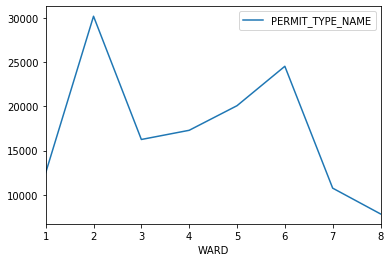

In [49]:
perm_edit = permits[0:139511]
display(perm_edit.tail())
perm_viz_edit = perm_edit[['PERMIT_TYPE_NAME', 'WARD']].groupby(['WARD']).agg('count')
perm_viz_edit.plot()

In this study, we will be looking at an overall impact across all years 2015-2017 rather than observing changes over time.<br>
Because of this, we will be **adding every value from the SY15-16 columns to their respective SY16-17 entries and dividing the final value by 2 to get the mean for each school across those two years.**<br>
Following that, we will aggregate our new data by ward and get the overall mean for each category (Graduation %, ELA proficiency %, and Math proficiency %) in DCPS schools.

In [50]:
fullviz = full_merge.groupby(['Ward \'16-\'17', 'School Name'],as_index=False).agg(lambda x : x.sum() if x.dtype=='int64' else x.head(1))
fullviz.drop(columns=['Ward \'15-\'16'], inplace=True)

fullviz['ELA - % Proficient \'15-\'16'] = (pd.to_numeric(fullviz['ELA - % Proficient \'15-\'16'], errors='coerce'))
fullviz['Math - % Proficient \'15-\'16'] = (pd.to_numeric(fullviz['Math - % Proficient \'15-\'16'], errors='coerce'))
fullviz['% Grad \'15-\'16'] = (pd.to_numeric(fullviz['% Grad \'15-\'16'], errors='coerce'))
fullviz['Total Enrollment (all grades) \'15-\'16'] = (pd.to_numeric(fullviz['% Grad \'15-\'16'], errors='coerce'))

fullviz['ELA - % Proficient \'16-\'17'] = (pd.to_numeric(fullviz['ELA - % Proficient \'16-\'17'], errors='coerce'))
fullviz['Math - % Proficient \'16-\'17'] = (pd.to_numeric(fullviz['Math - % Proficient \'16-\'17'], errors='coerce'))
fullviz['% Grad \'16-\'17'] = (pd.to_numeric(fullviz['% Grad \'16-\'17'], errors='coerce'))

fullviz['ELA mean'] = (fullviz['ELA - % Proficient \'15-\'16'] + fullviz['ELA - % Proficient \'16-\'17']) / 2
fullviz['Math mean'] = (fullviz['Math - % Proficient \'15-\'16'] + fullviz['Math - % Proficient \'16-\'17']) / 2
fullviz['Grad mean'] = (fullviz['% Grad \'15-\'16'] + fullviz['% Grad \'16-\'17']) / 2


tmp4 = fullviz[['Ward \'16-\'17', 'ELA mean']].groupby(['Ward \'16-\'17']).agg('mean')
tmp4 = tmp4.reset_index()
tmp5 = fullviz[['Ward \'16-\'17', 'Math mean']].groupby(['Ward \'16-\'17']).agg('mean')
tmp5 = tmp5.reset_index()
tmp6 = fullviz[['Ward \'16-\'17', 'Grad mean']].groupby(['Ward \'16-\'17']).agg('mean')
tmp6 = tmp6.reset_index()

Below is the relationship between ELA proficiency and Math proficiency as indicated by the PARCC exam.<br>
As can be observed, high ELA proficiency generally indicates high math proficiency. The same is true for the inverse.

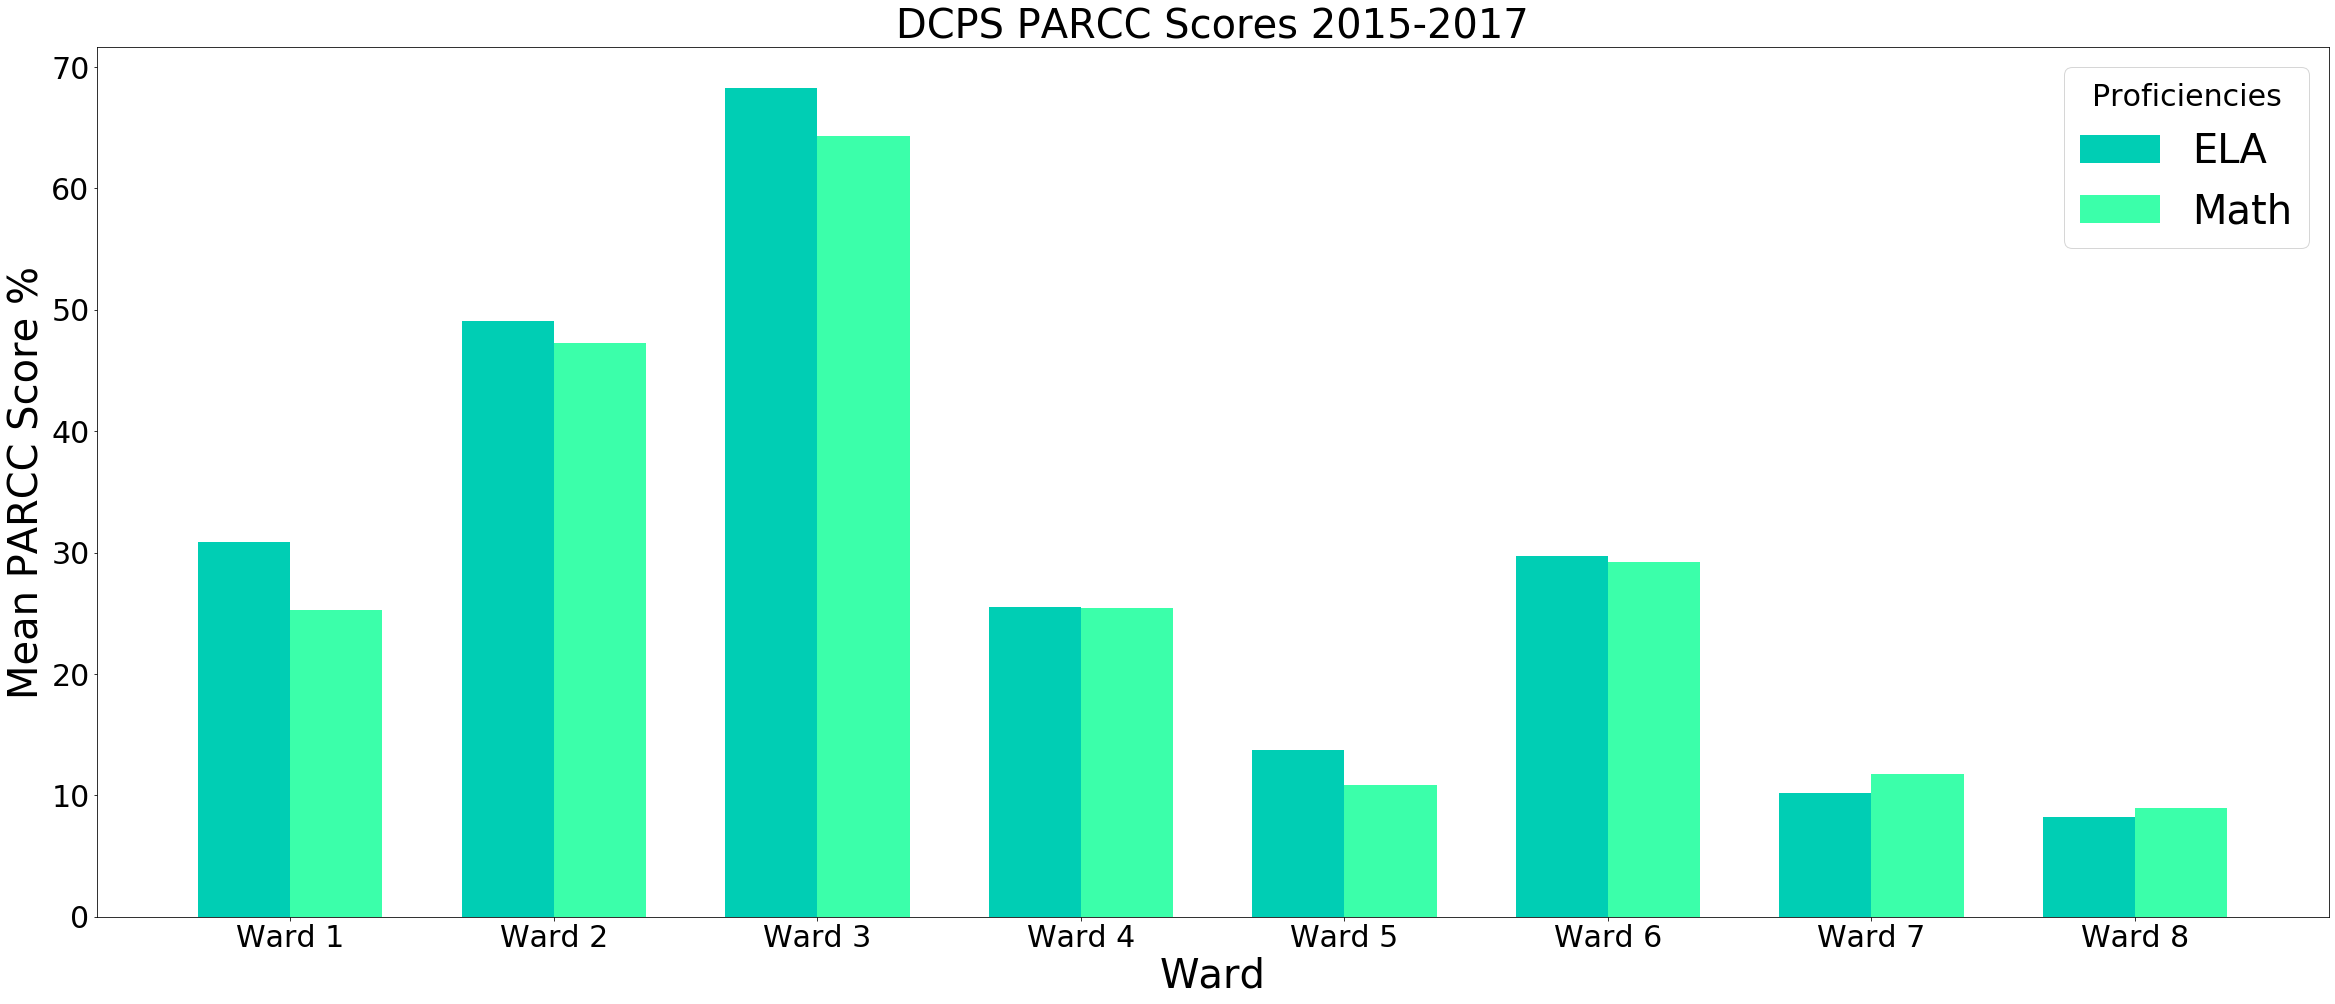

In [69]:
plt.figure(figsize=(40,16))
plt.xlabel("Ward", fontsize=40)
plt.ylabel("Mean PARCC Score %", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

ind = np.arange(8)
width = 0.35

plt.bar(ind, tmp4['ELA mean'], width, label="ELA", color="#00ceb4")
plt.bar(ind + width, tmp5['Math mean'], width, label="Math", color="#3bffaa")

plt.xticks(ind + width / 2, ('Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8'))
plt.title('DCPS PARCC Scores 2015-2017', fontsize=40)

plt.rcParams['legend.title_fontsize'] = '30'
plt.legend(loc='best', prop={'size': 40}, title = "Proficiencies")


Below is a display of how the mean graduation % per ward across all DCPS schools factors into PARCC proficiency.<br>
Speaking generally, there seems to be no immediate relationship between graduating and PARCC proficiency.

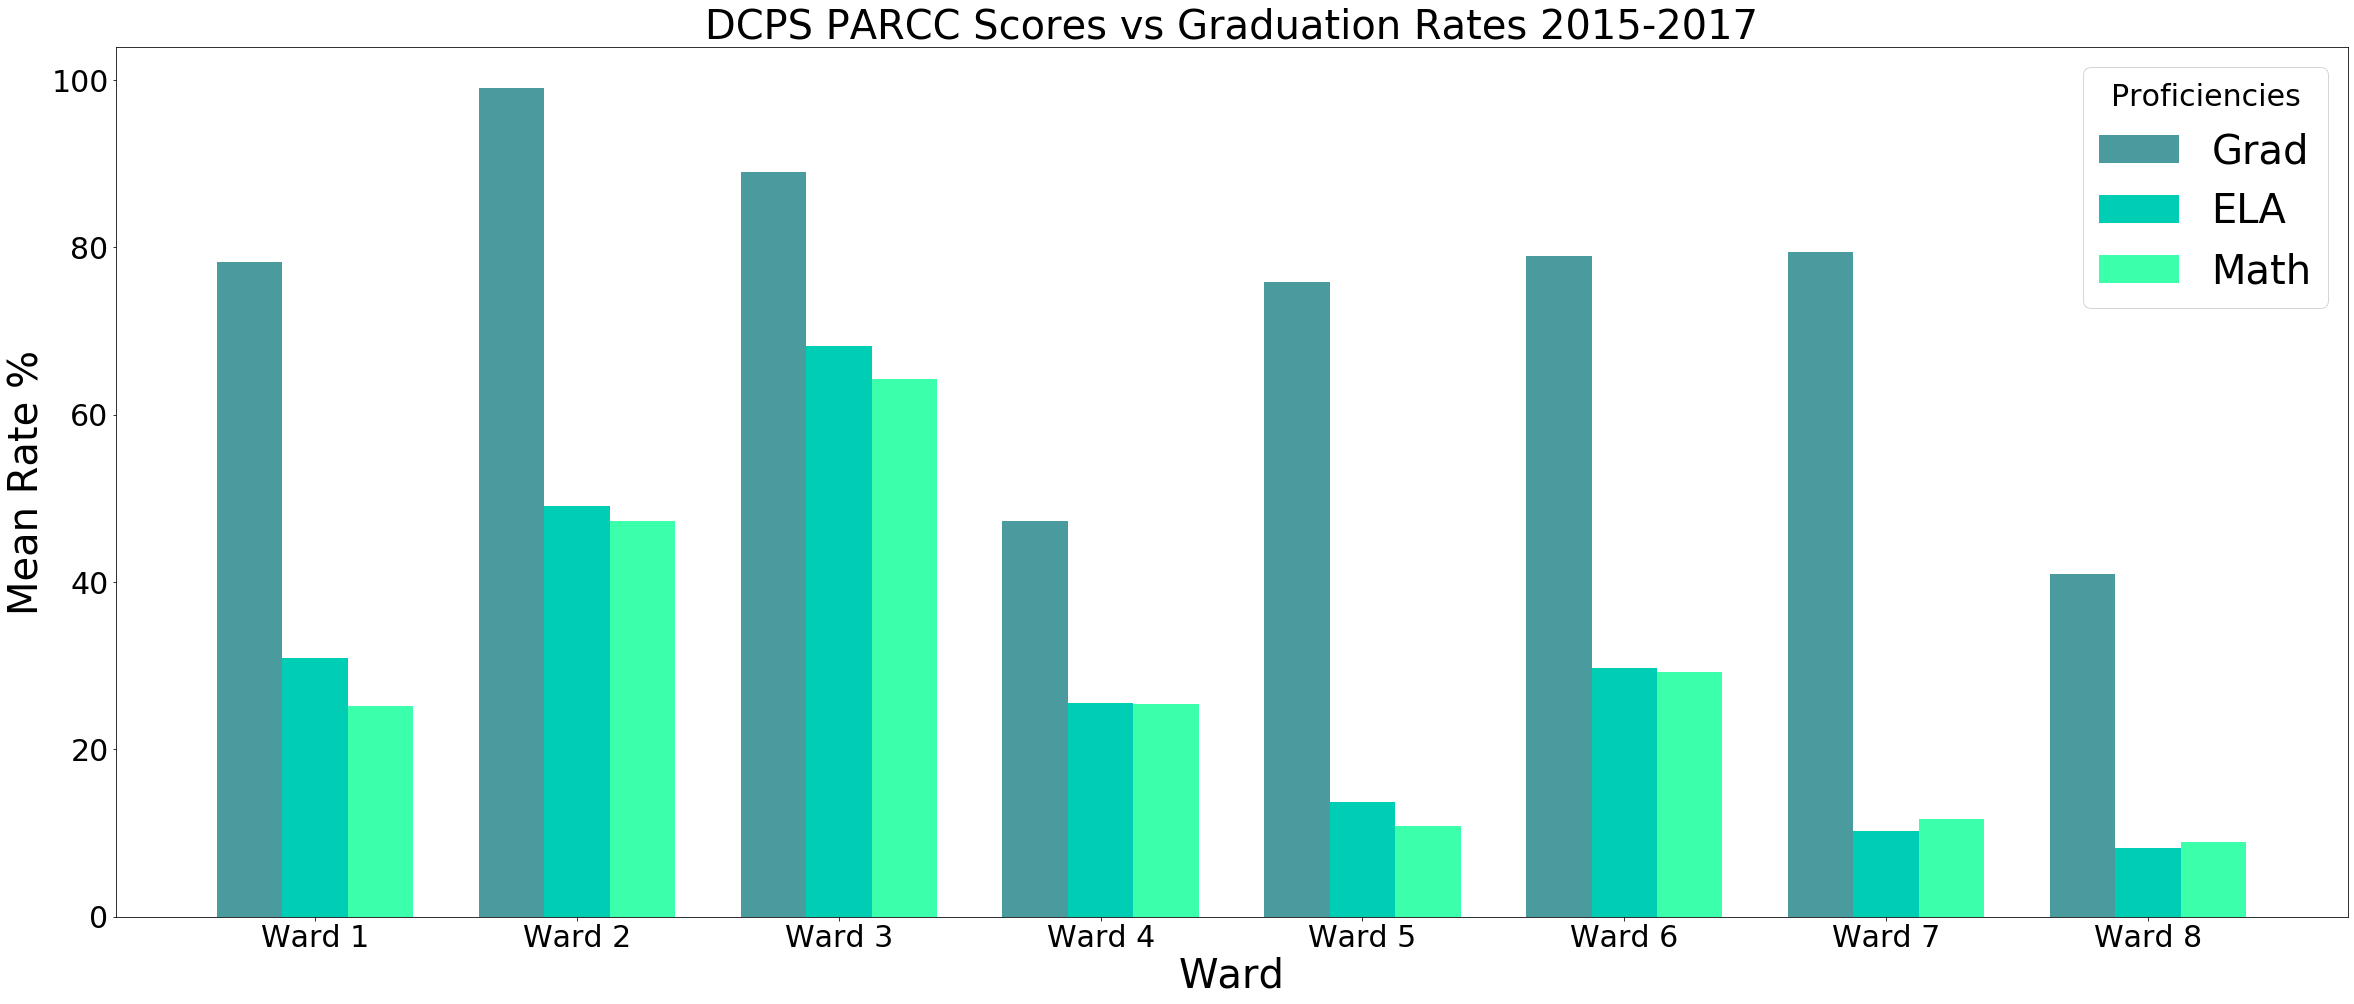

In [72]:
plt.figure(figsize=(40,16))
plt.xlabel("Ward", fontsize=40)
plt.ylabel("Mean Rate %", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

x = np.arange(8)
ind = range(0, 8)
width = 0.25

plt.bar(x - width, tmp6['Grad mean'], width, label="Grad", color="#499b9e")
plt.bar(x, tmp4['ELA mean'], width, label="ELA", color="#00ceb4")
plt.bar(x + width, tmp5['Math mean'], width, label="Math", color="#3bffaa")

plt.xticks(ind, ('Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8'))
plt.title('DCPS PARCC Scores vs Graduation Rates 2015-2017', fontsize=40)

plt.legend(loc='best', prop={'size': 40}, title = "Proficiencies")

Below is the final visualization, factoring in DC development to the previous vectors of analysis.<br>
Similar to the previous graph, there seems to be no relationship between development and graduation, nor development and PARCC proficiency.

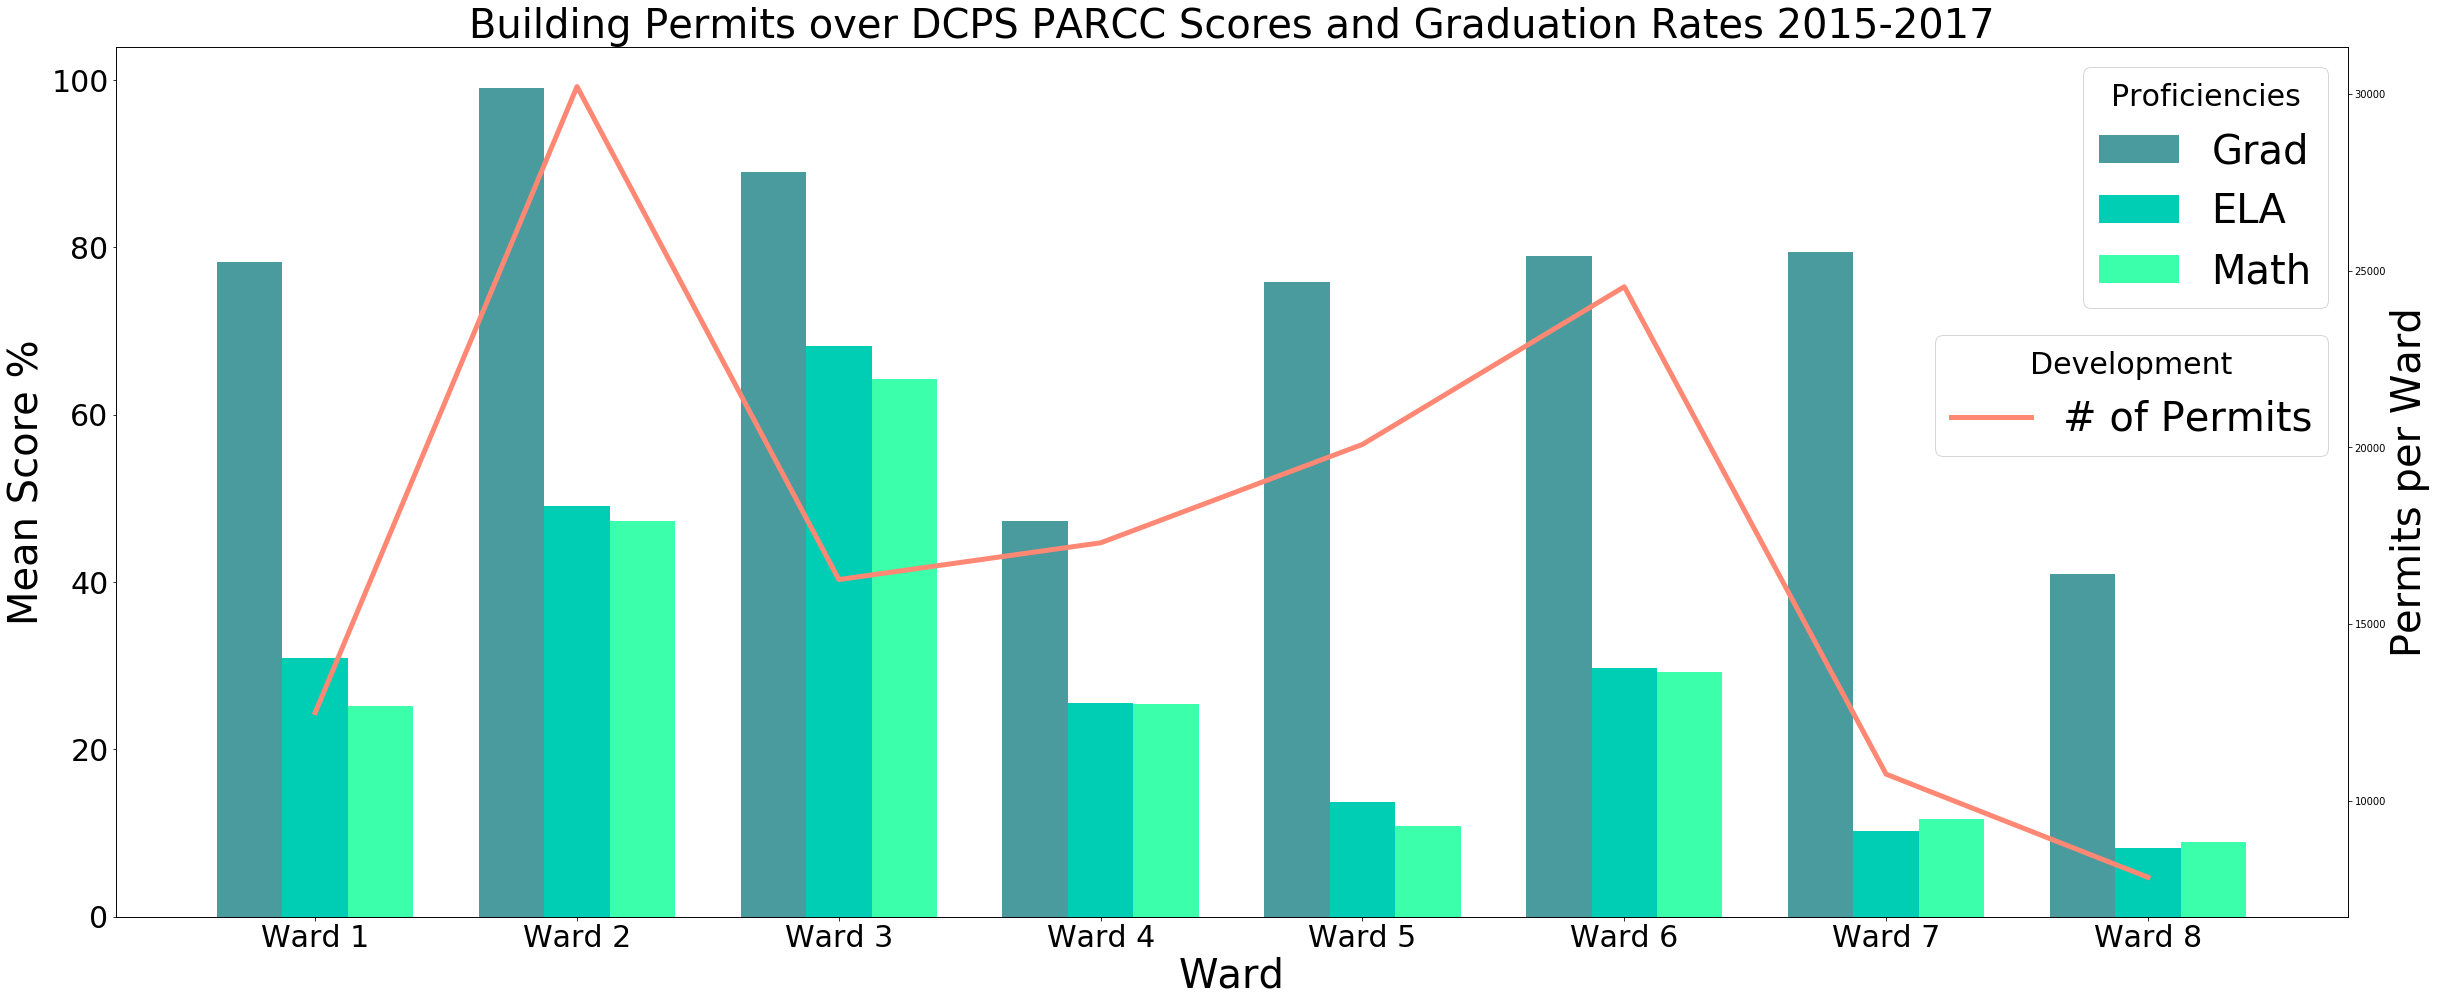

In [89]:
plt.figure(figsize=(40,16))
plt.xlabel("Ward", fontsize=40)
plt.ylabel("Mean Score %", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

x = np.arange(8)
ind = range(0, 8)
width = 0.25

plt.bar(x - width, tmp6['Grad mean'], width, label="Grad", color="#499b9e")
plt.bar(x, tmp4['ELA mean'], width, label="ELA", color="#00ceb4")
plt.bar(x + width, tmp5['Math mean'], width, label="Math", color="#3bffaa")


plt.xticks(ind, ('Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8'))
plt.title('Building Permits over DCPS PARCC Scores and Graduation Rates 2015-2017', fontsize=40)
plt.legend(loc='best', prop={'size': 40}, title = "Proficiencies")

x2 = np.arange(8)
y2 = perm_viz_edit['PERMIT_TYPE_NAME']
axes2 = plt.twinx()
axes2.plot(x2, y2, label='# of Permits', color="#ff8875", linewidth=5)
axes2.set_ylabel('Permits per Ward', fontsize=40)

plt.rcParams['legend.title_fontsize'] = '30'
plt.legend(loc=(.815,0.53), prop={'size': 40}, title = "Development")


plt.show()

# Data Sources <a class="anchor" id="sources"></a><font size = 2>[[top]](#top)

Original Data Sources, in order:<br>
- https://dme.dc.gov/sites/default/files/dc/sites/dme/publication/attachments/SY16-17_Citywide%20School%20Fact%20Sheets%20Appendices_10.06.17_2.xlsx 
- https://dme.dc.gov/sites/default/files/dc/sites/dme/publication/attachments/SY15-16_Citywide%20School%20Fact%20Sheets%20Appendices_10.14.16_0.xlsx 
- https://dme.dc.gov/sites/default/files/dc/sites/dme/publication/attachments/A.3%20Schools%20Modernized%20After%202008_0.xlsx
- https://dcps.dc.gov/sites/default/files/dc/sites/dcps/publication/attachments/DCPS%202016%20Graduation%20Data%20Overall%20Subgroup.xlsx
- https://dcps.dc.gov/sites/default/files/dc/sites/dcps/publication/attachments/DCPS%202017%20Graduation%20Data%20Overall%20Subgroup.xlsx
- https://dcps.dc.gov/sites/default/files/dc/sites/dcps/publication/attachments/DC%20PARCC%20Scores%20%E2%80%93%20School%20Year%202015-16.xlsx
- https://dcps.dc.gov/sites/default/files/dc/sites/dcps/publication/attachments/DC%20PARCC%20Scores%20-%20School%20Year%202016-17.xlsx

Cleaned Data Sources, in order (Download these in the notebook folder to run this notebook):<br>
- https://mega.nz/#!8thCGCAK!ncbw2HXi95u8E7n-X4QCLXC56jIh8-LOCQb-sCL6DGM
- https://mega.nz/#!g0o0UagI!n6pqguO1K0PQk--cZYzpspvBGvghpOeMlrsQrlg5fp4
- https://mega.nz/#!I8AS2CLY!xth4nsS5cgWnwiy3SQuxJAK-xdTFZKUT_2xwXeptW14
- https://mega.nz/#!cpowUY7I!aZ-NSnFOpxn6Pjn5TIhhF-sILqNr6G4UgjhKdCQDQgw
- https://mega.nz/#!h1o2QQpD!OBwAdV9Qt50t_YmPeuvA9pKALnETcdHeu7KDBIg-7J0
- https://mega.nz/#!Ex5mFChL!5anv_qx1qBfbuSMMEmZEIjuvBahTAPpJ7bfNwQWG96Q
- https://mega.nz/#!FgxCxKIQ!OHKHA3_yPtxpfka_I566-jOi99D2M13zH2pDHhTpAuo
- https://drive.google.com/file/d/1BRHR2-HZU1CQIzqDOxzxegzoAWnfXx-C/view?usp=sharing

Run this entire notebook for the below statement to write a .csv containing the current merged DF to the root directory.<br>
__NOTE: read-in data files must be in the same directory as this notebook for it to function properly.__

In [54]:
full_merge.to_csv('DCPS School Stats 1516 1617.csv')